# RESULT ANALYSIS (LINEAR 2nd OUTPUT DIMENSION)

In [2]:
import matplotlib.pyplot as plt
import pickle
import sys
sys.path.insert(0,'..')
from plot import plot_single_model  # function to plot convergence rate and logarithmic residual error of model (given fstar)

In [3]:
# load best 5 performing models
six = {}
seven = {}
fifteen = {}
sixteen = {}
seventeen = {}

with open("..\gs_models\gs_linear_2_6", "rb") as f:
    six = pickle.load(f)['model']
with open("..\gs_models\gs_linear_2_7", "rb") as f:
    seven = pickle.load(f)['model']
with open("..\gs_models\gs_linear_2_15", "rb") as f:
    fifteen = pickle.load(f)['model']
with open("..\gs_models\gs_linear_2_16", "rb") as f:
    sixteen = pickle.load(f)['model']
with open("..\gs_models\gs_linear_2_17", "rb") as f:
    seventeen = pickle.load(f)['model']

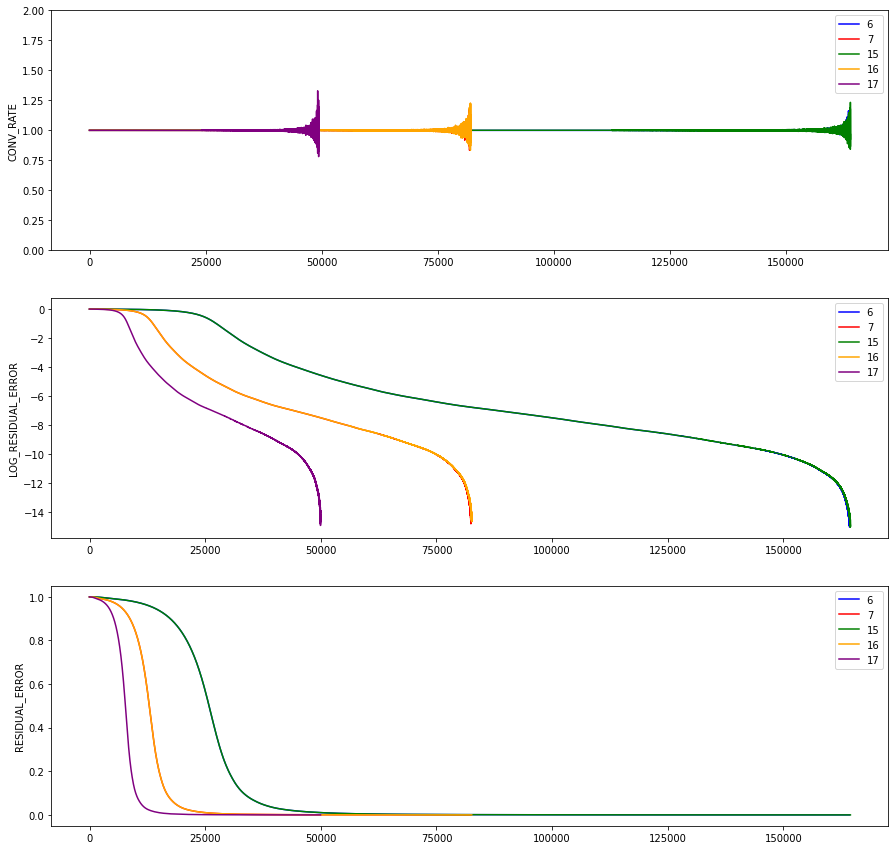

In [5]:
# fix f_best taking best performing model (17) fstar value, gotten with 50k iterations (file *gs_best_model_minimum_50k*)
fstar = -3447.420112247295

# plot convergence rate and logarithmic residual errors of all 5 models
fig, axs = plt.subplots(3, figsize=(15,15))
colors = ['blue', 'red', 'green', 'orange', 'purple']
six_conv, six_logres, six_res = plot_single_model(six, fstar, axs, colors[0], '6')
seven_conv, seven_logres, seven_res = plot_single_model(seven, fstar, axs, colors[1], '7')
fifteen_conv, fifteen_logres, fifteen_res = plot_single_model(fifteen, fstar, axs, colors[2], '15')
sixteen_conv, sixteen_logres, sixteen_res = plot_single_model(sixteen, fstar, axs, colors[3], '16')
seventeen_conv, seventeen_logres, seventeen_res = plot_single_model(seventeen, fstar, axs, colors[4], '17')
plt.show()

## UNDERSTANDING THE SUSPISCIOS "SUPERLINEARITY" FINALE
Plotting the very last iterations of residual error and logarithmic residual error might give more insight

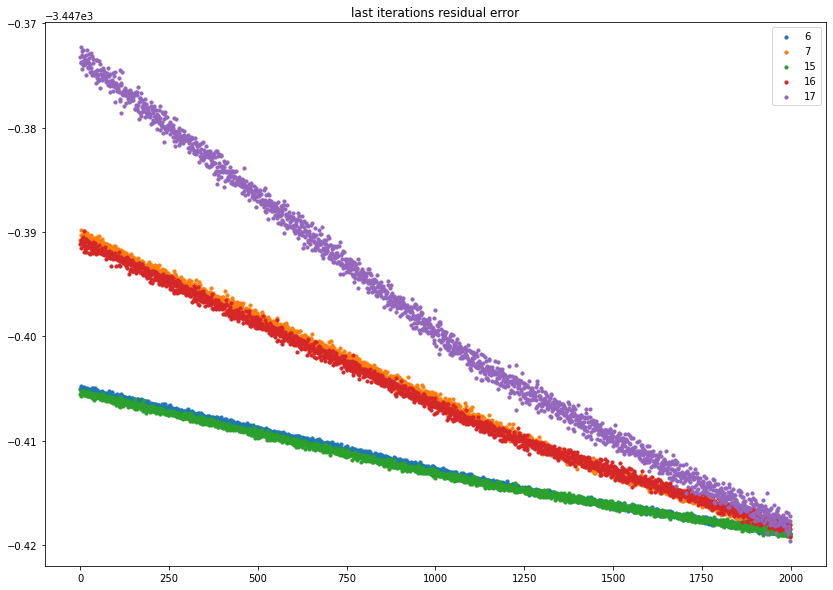

In [5]:
# plotting last 2000 function values, by model
len_plot = 2000
scatter_size = 10
fig, ax = plt.subplots(figsize=(14,10))
plt.scatter(range(len_plot), six.history['f'][-len_plot:], label='6', s=scatter_size)
plt.scatter(range(len_plot), seven.history['f'][-len_plot:], label='7', s=scatter_size)
plt.scatter(range(len_plot), fifteen.history['f'][-len_plot:], label='15', s=scatter_size)
plt.scatter(range(len_plot), sixteen.history['f'][-len_plot:], label='16', s=scatter_size)
plt.scatter(range(len_plot), seventeen.history['f'][-len_plot:], label='17', s=scatter_size)
plt.legend()
plt.title('last iterations function values')
plt.show()

Above figure shows how the decrease in raw function value is not abrupt in last iterations. It keeps instead being slow and steady.

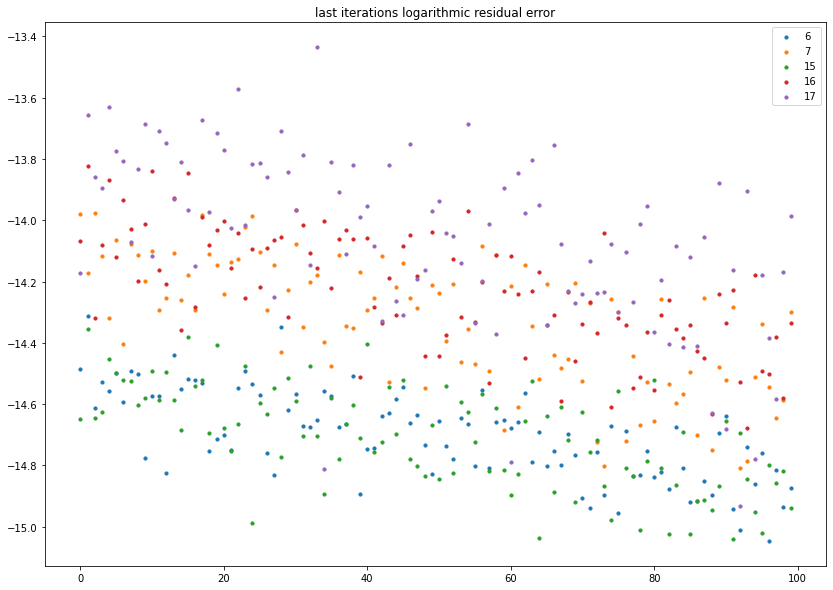

In [6]:
# plotting last 100 logarithmic residual error values, by model
len_plot = 100
scatter_size = 10
fig, ax = plt.subplots(figsize=(14,10))
plt.scatter(range(len_plot), six_logres[-len_plot:], label='6', s=scatter_size)
plt.scatter(range(len_plot), seven_logres[-len_plot:], label='7', s=scatter_size)
plt.scatter(range(len_plot), fifteen_logres[-len_plot:], label='15', s=scatter_size)
plt.scatter(range(len_plot), sixteen_logres[-len_plot:], label='16', s=scatter_size)
plt.scatter(range(len_plot), seventeen_logres[-len_plot:], label='17', s=scatter_size)
plt.title('last iterations logarithmic residual error')
plt.legend()
plt.show()

As motivated in the report, better enlarged here by the above figure, the fake superlinearity is motivated by being an artifact of the formula for calculating the logarithmic residual error.

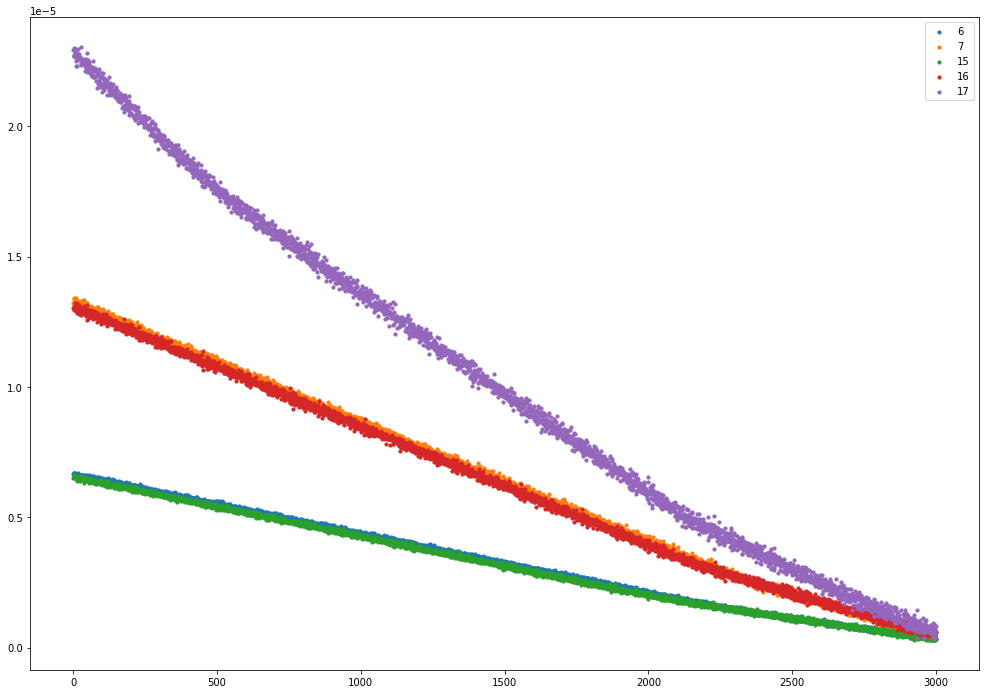

In [7]:
# plotting last 3000 residual error values, by model
len_plot = 3000
scatter_size = 10
fig, ax = plt.subplots(figsize=(17,12))
plt.scatter(range(len_plot), six_res[-len_plot:], label='6', s=scatter_size)
plt.scatter(range(len_plot), seven_res[-len_plot:], label='7', s=scatter_size)
plt.scatter(range(len_plot), fifteen_res[-len_plot:], label='15', s=scatter_size)
plt.scatter(range(len_plot), sixteen_res[-len_plot:], label='16', s=scatter_size)
plt.scatter(range(len_plot), seventeen_res[-len_plot:], label='17', s=scatter_size)
plt.legend()
plt.show()

Similar considerations as before can be portrayed here too, showing the expected slowness remaining steady and avoiding abrupt accelerations.